In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage


In [2]:
#Importing Dataset
df = pd.read_csv("EastWestAirlines(3).csv")

#Data Preprocessing
df.describe()
df.info()
df.head()
df.isnull().sum()

df = df.fillna(df.median(numeric_only=True))

numeric_cols = df.select_dtypes(include=np.number).columns

scaler = StandardScaler()
X = scaler.fit_transform(df[numeric_cols])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


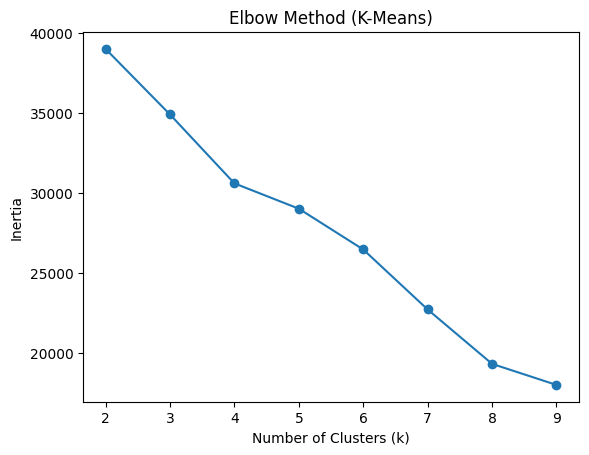

In [3]:
#Appending Cluster IDs into Inertia list
inertia = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)


#Visualizations
plt.plot(range(2, 10), inertia,marker='o')
plt.title('Elbow Method (K-Means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


K-Means Silhouette Score : 0.25318528553042163


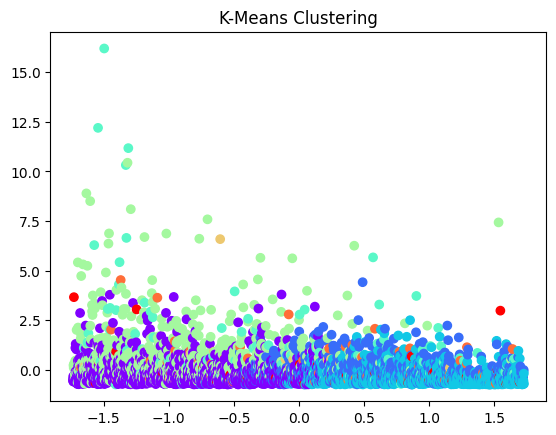

In [4]:
#looking at the graph , we should take k=8 .
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X)
k_labels = kmeans.fit_predict(X)
print("K-Means Silhouette Score :",silhouette_score(X,k_labels))

plt.scatter(X[:,0],X[:,1],c=k_labels,cmap='rainbow')
plt.title('K-Means Clustering')
plt.show()



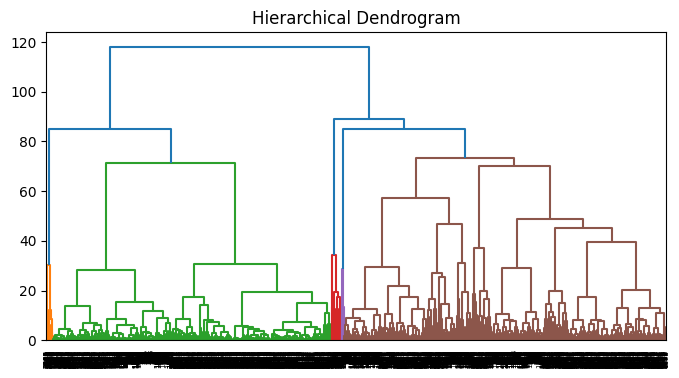

In [6]:
#Hierarchical Clustering

Z = linkage(X,method='ward')
plt.figure(figsize=(8,4))
dendrogram(Z)
plt.title("Hierarchical Dendrogram")
plt.show()


Hierarchical Silhouette Score : 0.17094672804392513


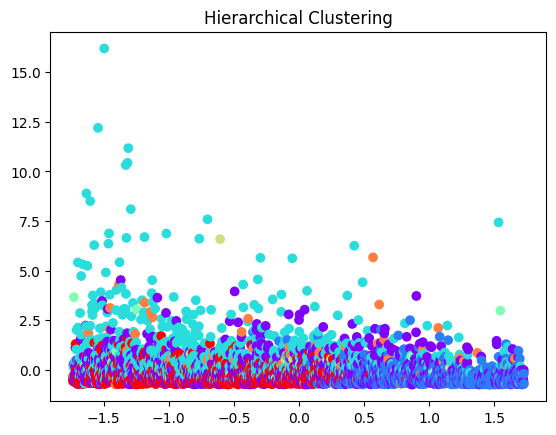

DBSCAN Silhouette Score : 0.1895328629344176


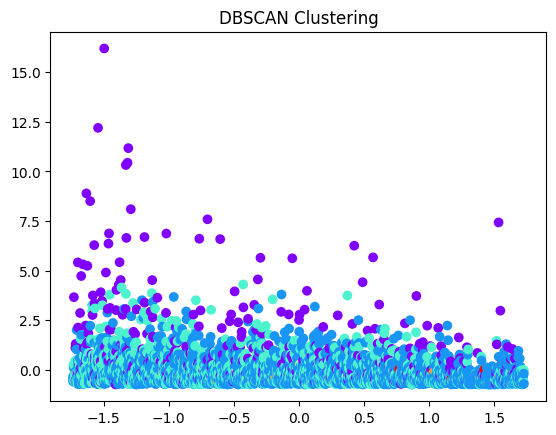

In [7]:
#according to the dendrogram , number of clusters are 7

hclust = AgglomerativeClustering(n_clusters=7)
h_labels = hclust.fit_predict(X)
print("Hierarchical Silhouette Score :",silhouette_score(X,h_labels))

plt.scatter(X[:,0],X[:,1],c=h_labels,cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.show()


#DBSCAN Clustering

dbscan = DBSCAN(eps=1.5,min_samples=5)
d_labels = dbscan.fit_predict(X)
no_of_clusters = (len(set(d_labels))-(1 if -1 in d_labels else 0))

if no_of_clusters>1 :
    print("DBSCAN Silhouette Score :",silhouette_score(X,d_labels))

plt.scatter(X[:,0],X[:,1],c=d_labels,cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.show()
